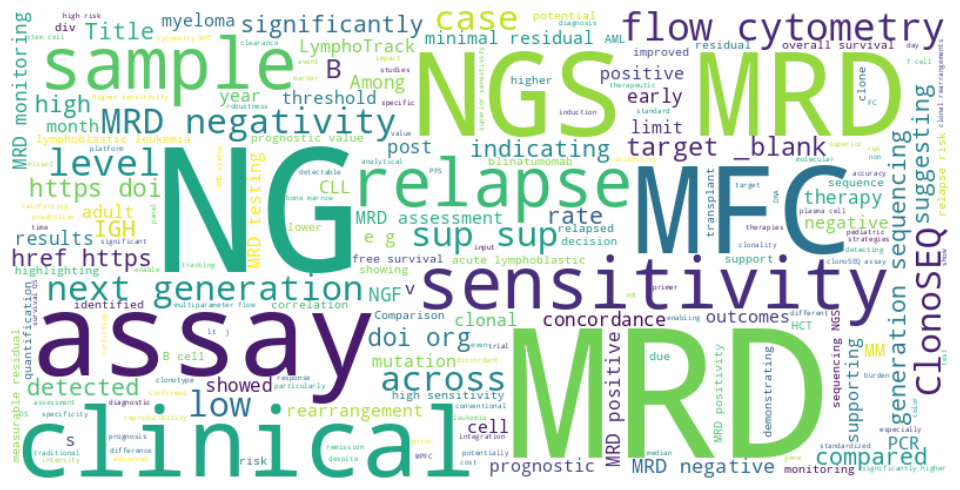

In [52]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import pandas as pd

# Your DataFrame
df =pd.read_excel('data/Article-Summary.xlsx')

# Combine text
text = ' '.join(df['Article Summary'].dropna().astype(str))

# Define custom stopwords
custom_stopwords = set(STOPWORDS)
# stopwords = STOPWORDS.union(custom_stopwords)

custom_stopwords.update(['et', 'al', 'patient', 'patients', 'method', 'disease', 'detection', 'outcome', 'result', 'study', 'Review', 
                         
                         'a', 'an', 'the', 'and', 'or', 'but', 'if', 'while', 'with', 'without', 'to',
                        'of', 'for', 'on', 'in', 'out', 'at', 'by', 'from', 'as', 'is', 'are', 'was', 'were',
                        'be', 'been', 'being', 'have', 'has', 'had', 'do', 'does', 'did',
                        'will', 'would', 'can', 'could', 'should', 'may', 'might', 'must',
                        'this', 'that', 'these', 'those', 'it', 'its', 'they', 'them', 'their', 'we', 'our', 'us', 'you', 'your',
                        'i', 'me', 'my', 'he', 'him', 'his', 'she', 'her', 'what', 'which', 'who', 'whom',
                        'using', 'use', 'used', 'need', 'needed', 'needs', 'based', 'also',
                        'such', 'however', 'therefore', 'thus', 'e.g', 'i.e', 'etc',
                        'can', 'cannot', 'more', 'most', 'many', 'some', 'few', 'much', 'less', 'least',
                        'one', 'two', 'three', 'first', 'second', 'third',
                        'about', 'into', 'over', 'under', 'again', 'still', 'yet', 'very', 'just',
                        'get', 'got', 'getting', 'make', 'made', 'makes',
                        'like', 'so', 'yes', 'no', 'not', 'than', 'then', 'now', 'soon', 'multiple', 'detect', 'treatment',
                        'each', 'every', 'all', 'any', 'none',
                        'because', 'since', 'until', 'before', 'after', 'when', 'where', 'how', 'including', 'associated', 'additional',
                        'let', 'say', 'says', 'said', 'see', 'seen',
                        'new', 'old', 'good', 'bad', 'better', 'best', 'important', 'common', 'methods',
                        # Domain-specific (add/remove as needed)
                        'paper', 'result', 'approach', 'method', 'model', 'dataset', 'data', 'analysis','strong', 'li', 'p','ol',
                        'code', 'project', 'implementation', 'task', 'process', 'step', 'improve', 'article', 'key', 'points', 'help', 'reference', 'references'])  # Add your own exclusions

# Create word cloud
wordcloud = WordCloud(stopwords=custom_stopwords,
                      background_color='white',
                      width=800,
                      height=400).generate(text)

# Display
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.tight_layout()
plt.savefig('wc.png')
plt.show()


NET GRAPH

In [55]:
import pandas as pd
from pyvis.network import Network

# Step 1: Load Excel file
df = pd.read_excel("data/Article-Summary.xlsx")

# Step 2: Preprocess topics
df['Topics'] = df['Topics'].apply(lambda x: [topic.strip() for topic in str(x).split('\n') if topic.strip()])
df = df[df['Topics'].map(len) > 0]

# Step 3: Create a PyVis network
net = Network(height='750px', width='100%', bgcolor='#ffffff', font_color='black', notebook=False)

# Disable default hover tooltips

net.barnes_hut()
net.set_options("""
{
  "interaction": {
    "hover": false,
    "tooltipDelay": 999999
  }
}
""")
# Step 4: Add nodes and edges
for _, row in df.iterrows():
    title = row['Article-Title']
    summary = row['Article Summary']
    topics = row['Topics']

    summary_html = (
        f"<div class='custom-tooltip' style='max-height:75%; overflow-y:auto; width:80%;'>"
        f"{summary}</div>"
    )
    net.add_node(title, label=title, shape='box', color='lightblue', title=summary_html)

    for topic in topics:
        net.add_node(topic, label=topic, shape='ellipse', color='lightgreen')
        net.add_edge(title, topic)

# Step 5: Save the graph
net.save_graph('abc.html')

# Step 6: Post-process the HTML to show tooltip only on click
with open("abc.html", "r") as f:
    html = f.read()

# Inject JS to change hover behavior to click
inject_script = """
<script type="text/javascript">
    network.on("click", function (params) {
        if (params.nodes.length > 0) {
            var nodeId = params.nodes[0];
            var node = nodes.get(nodeId);
            if (node && node.title) {
                var tooltipDiv = document.createElement('div');
                tooltipDiv.innerHTML = node.title;
                tooltipDiv.style.position = 'fixed';
                tooltipDiv.style.zIndex = '9999';
                tooltipDiv.style.top = '100px';
                tooltipDiv.style.left = '100px';
                tooltipDiv.style.width = '750px';
                tooltipDiv.style.background = '#fff';
                tooltipDiv.style.maxHeight = '500px';       // Limit height
                tooltipDiv.style.overflowY = 'auto';        // Enable vertical scroll if content overflows
                tooltipDiv.style.fontSize = '13px';         // Optional: make font a bit larger
                tooltipDiv.style.border = '1px solid #aaa';
                tooltipDiv.style.padding = '10px';
                tooltipDiv.style.boxShadow = '2px 2px 12px rgba(0,0,0,0.2)';
                tooltipDiv.className = 'pyvis-tooltip';
                document.body.appendChild(tooltipDiv);

                setTimeout(() => tooltipDiv.remove(), 500000);  // Auto-close after 5s
            }
        }
    });
</script>
"""

# Disable native tooltips (triggered on hover)
html = html.replace('tooltip: true', 'tooltip: false')
html = html.replace('</body>', f'{inject_script}\n</body>')

# Save updated HTML
with open("abc.html", "w") as f:
    f.write(html)


In [ ]:
import pandas as pd
from pyvis.network import Network

# Step 1: Load Excel file
df = pd.read_excel("data/Article-Summary.xlsx")

# Step 2: Preprocess topics
df['Topics'] = df['Topics'].apply(lambda x: [topic.strip() for topic in str(x).split('\n') if topic.strip()])
df = df[df['Topics'].map(len) > 0]

# Step 3: Create a PyVis network
net = Network(height='750px', width='100%', bgcolor='#ffffff', font_color='black', notebook=False)

# Disable default hover tooltips
net.barnes_hut()
net.set_options("""
{
  "interaction": {
    "hover": false,
    "tooltipDelay": 999999
  }
}
""")

# Step 4: Add nodes and edges
for _, row in df.iterrows():
    title = row['Article-Title']
    summary = row['Article Summary']
    topics = row['Topics']

    summary_html = (
        f"<div class='custom-tooltip' style='max-height:75%; overflow-y:auto; width:80%;'>{summary}</div>"
    )
    net.add_node(title, label=title, shape='box', color='lightblue', title=summary_html)

    for topic in topics:
        net.add_node(topic, label=topic, shape='ellipse', color='lightgreen')
        net.add_edge(title, topic)

# Step 5: Save the graph
net.save_graph('abc.html')

# Step 6: Post-process the HTML to show tooltip only on click with close button
with open("abc.html", "r") as f:
    html = f.read()

# Inject JS to change hover behavior to click and add close button
inject_script = """
<script type="text/javascript">
    network.on("click", function (params) {
        if (params.nodes.length > 0) {
            var nodeId = params.nodes[0];
            var node = nodes.get(nodeId);
            if (node && node.title) {
                var tooltipDiv = document.createElement('div');
                tooltipDiv.innerHTML = `<button style="float:right; margin-bottom:5px;" onclick="this.parentElement.remove();">&#x2715;</button>` + node.title;
                tooltipDiv.style.position = 'fixed';
                tooltipDiv.style.zIndex = '9999';
                tooltipDiv.style.top = '100px';
                tooltipDiv.style.left = '100px';
                tooltipDiv.style.width = '750px';
                tooltipDiv.style.background = '#fff';
                tooltipDiv.style.maxHeight = '500px';
                tooltipDiv.style.overflowY = 'auto';
                tooltipDiv.style.fontSize = '13px';
                tooltipDiv.style.border = '1px solid #aaa';
                tooltipDiv.style.padding = '10px';
                tooltipDiv.style.boxShadow = '2px 2px 12px rgba(0,0,0,0.2)';
                tooltipDiv.className = 'pyvis-tooltip';
                document.body.appendChild(tooltipDiv);
            }
        }
    });
</script>
"""

# Disable native tooltips (triggered on hover)
html = html.replace('tooltip: true', 'tooltip: false')
html = html.replace('</body>', f'{inject_script}\n</body>')

# Save updated HTML
with open("abc.html", "w") as f:
    f.write(html)